In [1]:
from typing import Sequence
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset
1. **Reading the Dataset:**
    - Use `pandas` to read the Iris dataset into a data frame.
    - The dataset does not contain headers. Assign the following column names to your data frame: `['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']`

In [2]:
iris = pd.read_csv('data/Iris.csv')

2. **Data Summarization:**
    - Compute the following summary statistics for each of the numerical columns (`sepal_length`, `sepal_width`, `petal_length`, `petal_width`):
        * Mean
        * Median
        * Standard Deviation
    - Write these summary statistics to a new CSV file named `iris_summary.csv`.

In [3]:
iris_summary = iris.drop("Species", axis=1).aggregate(['mean', 'median', 'std'])
iris_summary.to_csv('data/iris_summary.csv')
iris_summary

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
mean,75.500000,5.843333,3.054000,3.758667,1.198667
median,75.500000,5.800000,3.000000,4.350000,1.300000
std,43.445368,0.828066,0.433594,1.764420,0.763161


3. **Data Visualization:**
    - Use `seaborn` to create the following plots:
        a. A pair plot (`pairplot`) of all numerical columns colored by the `species` column.
        b. A box plot showing the distribution of each numerical column grouped by `species`.

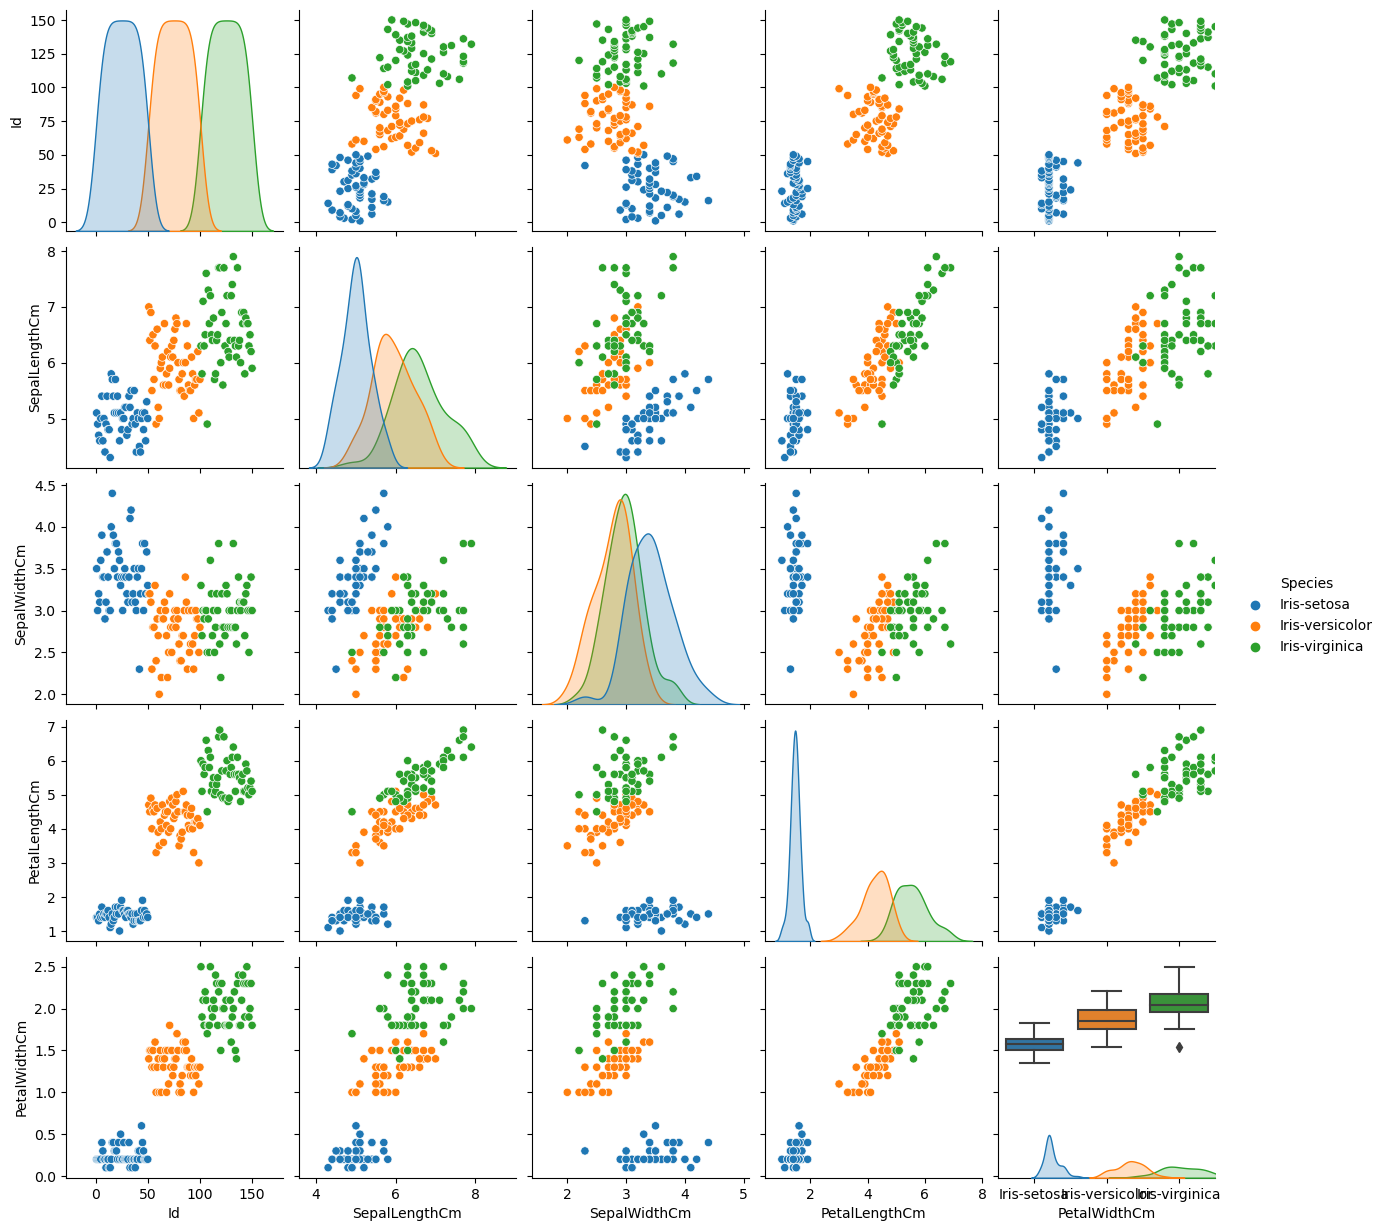

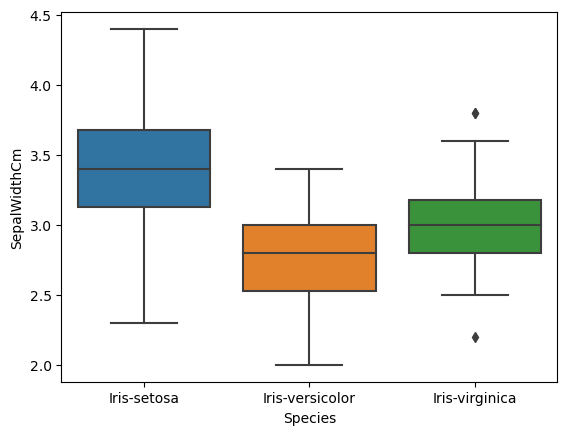

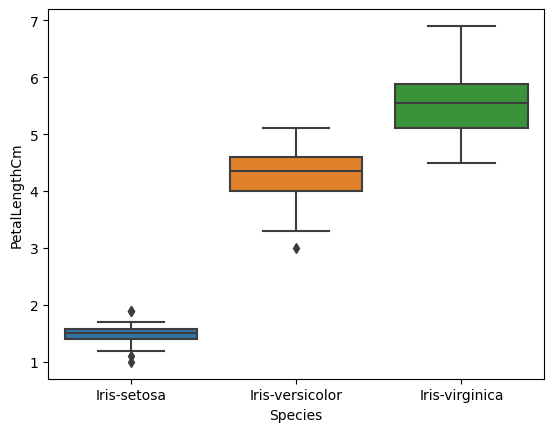

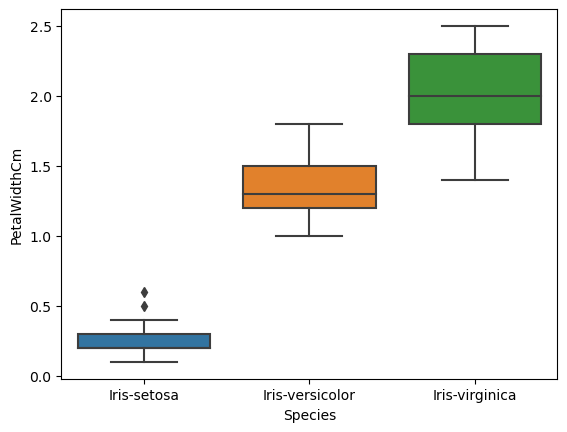

In [4]:
sns.pairplot(iris, hue='Species')
for column in iris.drop("Id", axis=1).select_dtypes(include='number').columns:
    sns.boxplot(x='Species', y=column, data=iris)
    plt.show()

4. **Plotting Function**
    - Write a function that uses `seaborn` to visualize the iris data.

    - Your function should:

        * take an iris-like data frame as an input
        * allow the user to choose between a strip, violin, or box plot
        * set one of the above three be the default
        * have a docstr with meaningful help so users can get help() on it
        * produce the plot requested by the user (of course!)

0: strip
1: box
2: violin


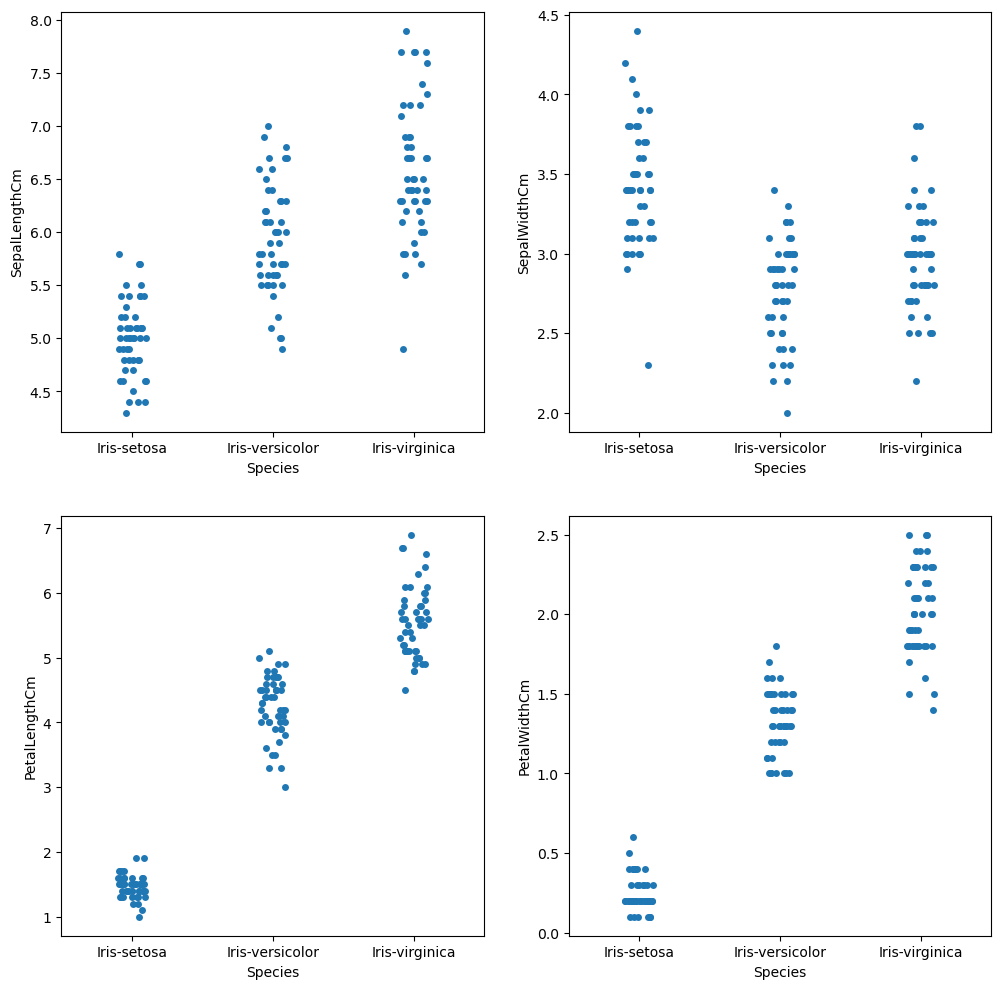

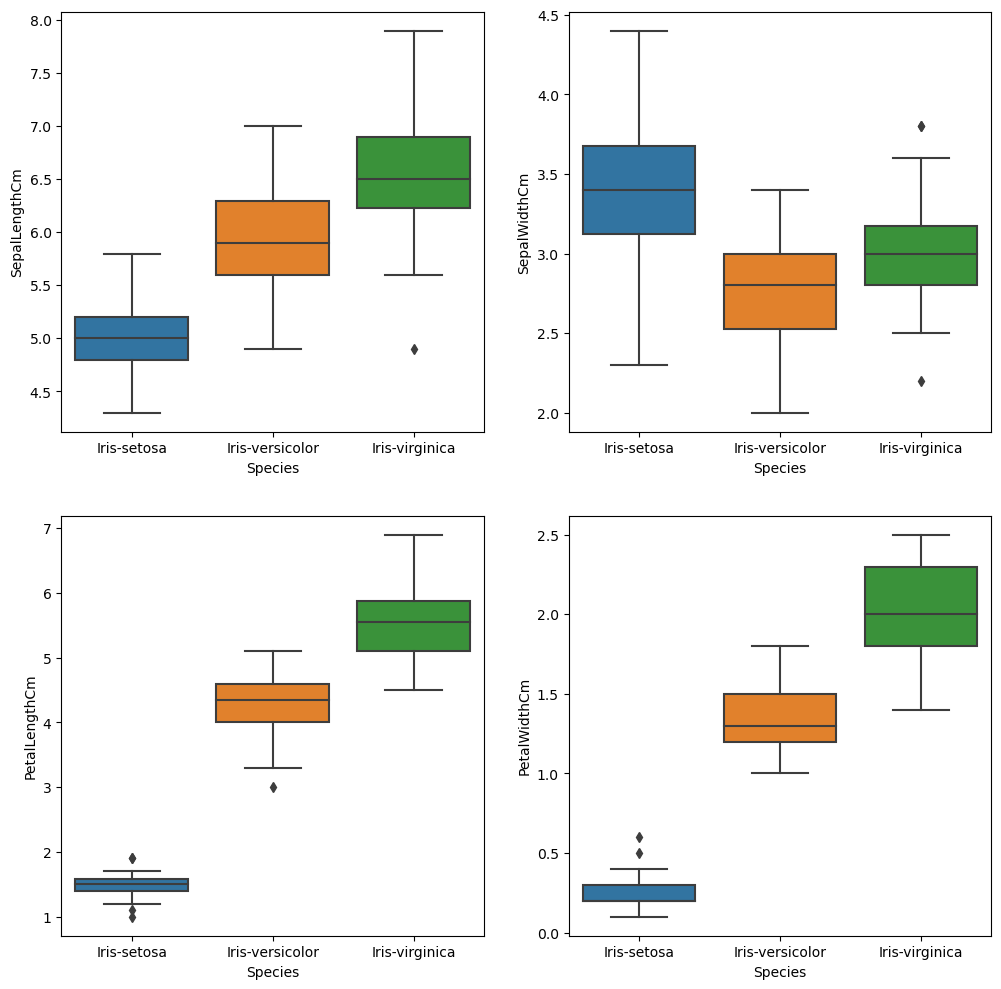

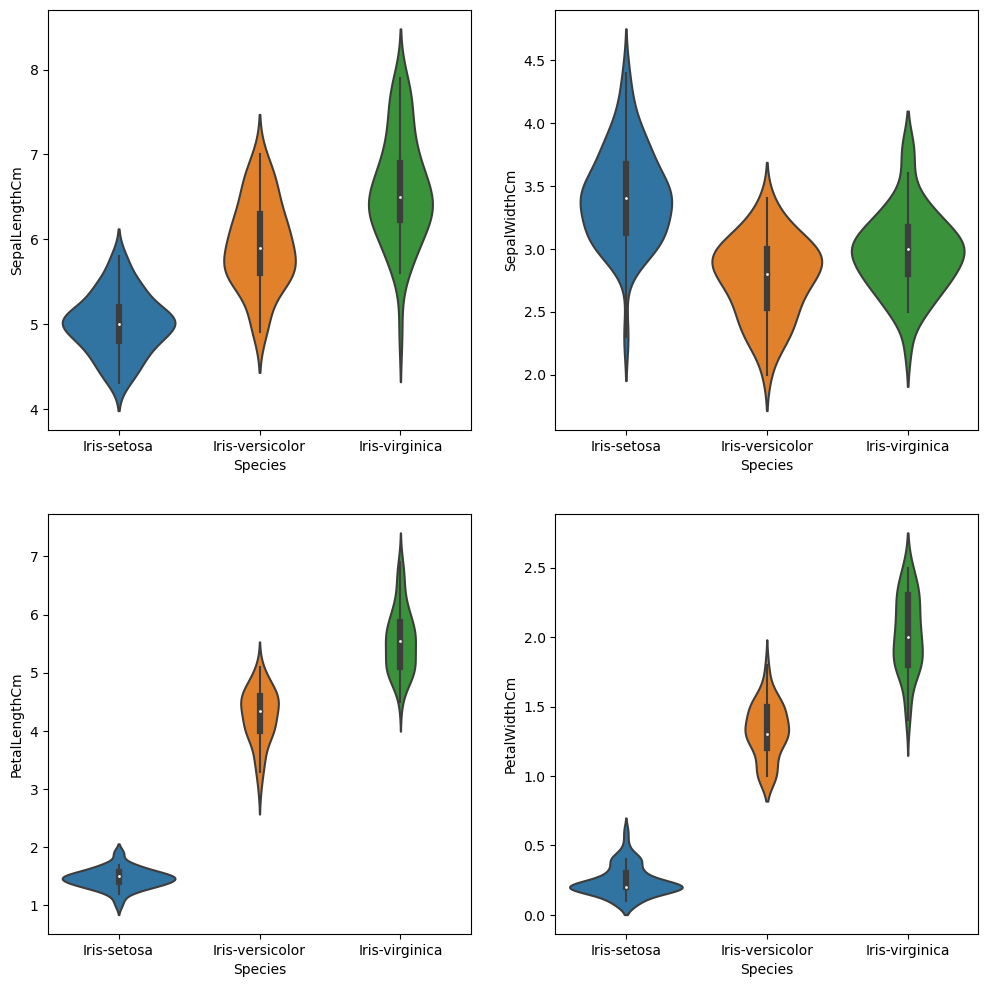

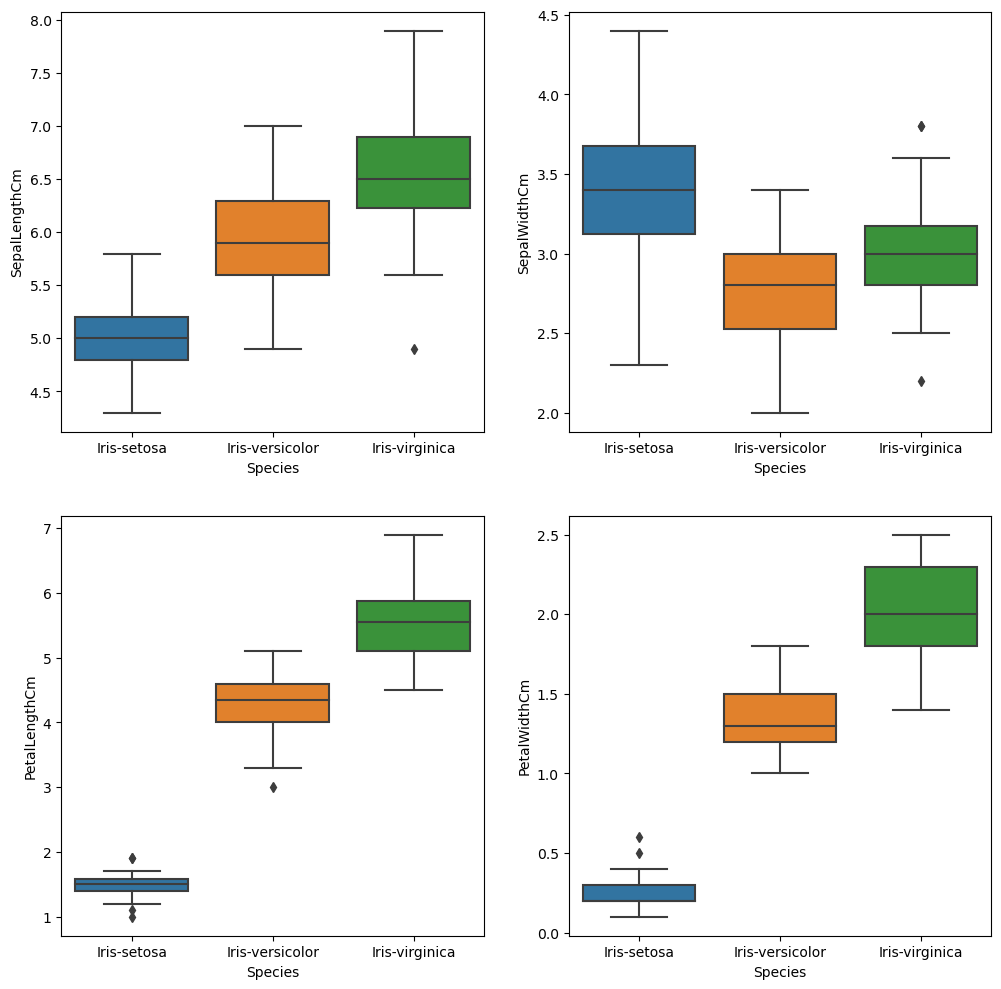

In [5]:
class Input:
    @staticmethod
    def select(options: Sequence[str]) -> int:
        """Return the index of the selected option.

        :param options: A list of options.
        :return: The index of the selected option.
        """
        for i, option in enumerate(options):
            print(f'{i}: {option}')
        while True:
            try:
                return int(input('Select an option: '))
            except ValueError:
                print('Invalid input. Please try again.')
    
def plot_iris(iris: pd.DataFrame, typ: str | None) -> None:
    """Plot the iris data set.
    
    :param iris: An iris-like data set.
    :param typ: The type of plot to use. One of 'strip', 'box', or 'violin'. Pass None to ask the user.
    """

    numeric_columns = iris.select_dtypes(include='number').drop("Id", axis = 1).columns

    if typ == 'strip':
        fig, ax = plt.subplots(2, 2, figsize=(12, 12))
        for i, column in enumerate(numeric_columns):
            sns.stripplot(data=iris, x='Species', y=column, ax=ax[i // 2, i % 2])
    elif typ == 'box':
        fig, ax = plt.subplots(2, 2, figsize=(12, 12))
        for i, column in enumerate(numeric_columns):
            sns.boxplot(data=iris, x='Species', y=column, ax=ax[i // 2, i % 2])
    elif typ == 'violin':
        fig, ax = plt.subplots(2, 2, figsize=(12, 12))
        for i, column in enumerate(numeric_columns):
            sns.violinplot(data=iris, x='Species', y=column, ax=ax[i // 2, i % 2])
    elif typ is None:
        opt = Input.select(['strip', 'box', 'violin'])
        if opt == 0:
            plot_iris(iris, 'strip')
        elif opt == 1:
            plot_iris(iris, 'box')
        elif opt == 2:
            plot_iris(iris, 'violin')
    else:
        raise ValueError(f'Unknown plot type: {typ}')   

plot_iris(iris, 'strip')
plot_iris(iris, 'box')
plot_iris(iris, 'violin')
plot_iris(iris, None)